In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

%matplotlib inline

# Lagrangian Interpolation

In [2]:
def lfun(xvals, jj, x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem, xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom
def lagran_interp(xvals, fvals, x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals, jj, x)
    return ipoly

In [3]:
f1 = lambda x: x**2./(1.+x**4.)
xquery = np.linspace(-1., 1., int(1e3)+1)
ftrue = f1(xquery)
xnodes = xquery[::100]
fnodes = ftrue[::100]
print(xnodes.size)


11


# Plotting

In [4]:
def interp_plotter(xnodes, fnodes, xquery, ftrue):
    finterp = lagran_interp(xnodes, fnodes, xquery)
    plt.plot(xquery, np.ma.log10(np.abs(ftrue - finterp)))
    plt.xlabel("$x$")
    plt.ylabel("$\log_{10}|Error|$")
    plt.show()
    

11
1


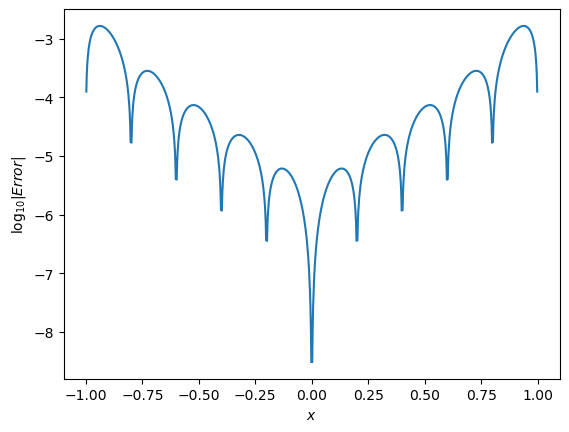

21
2


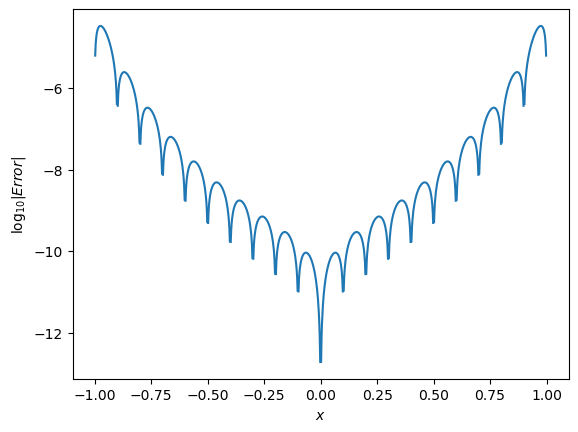

31
3


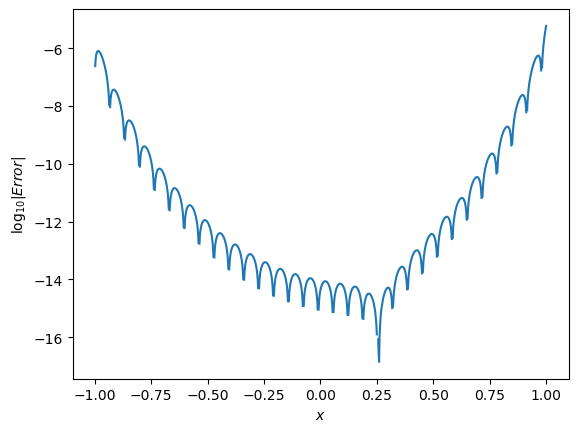

41
4


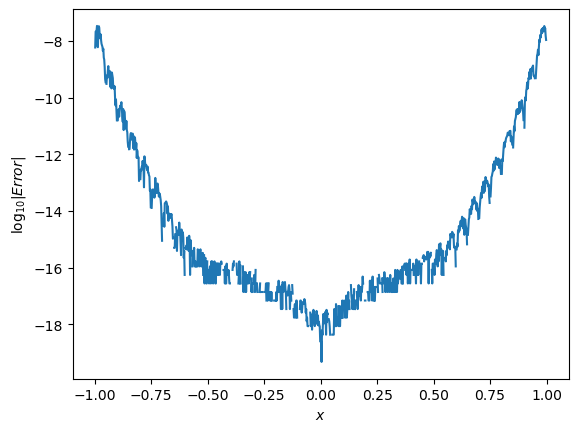

51
5


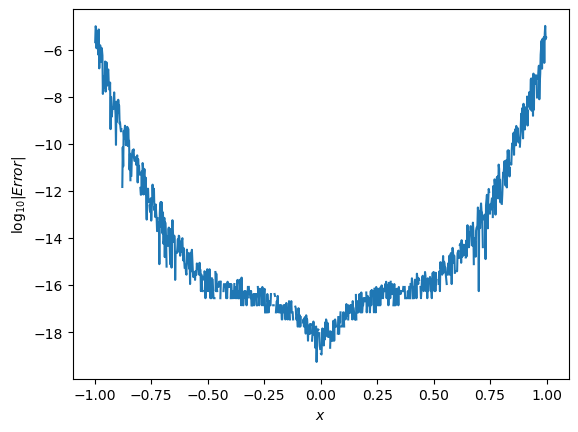

In [5]:
for i in range(1, 6):
    xnodes = xquery[::int(100/i)]
    fnodes = ftrue[::int(100/i)]
    print(xnodes.size)
    print(i)
    interp_plotter(xnodes, fnodes, xquery, ftrue)
    

    


49
0


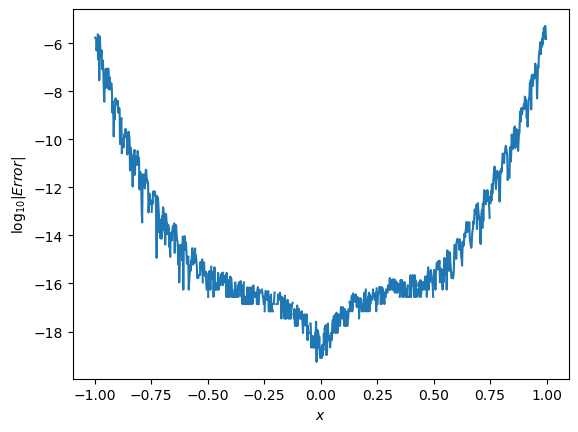

50
1


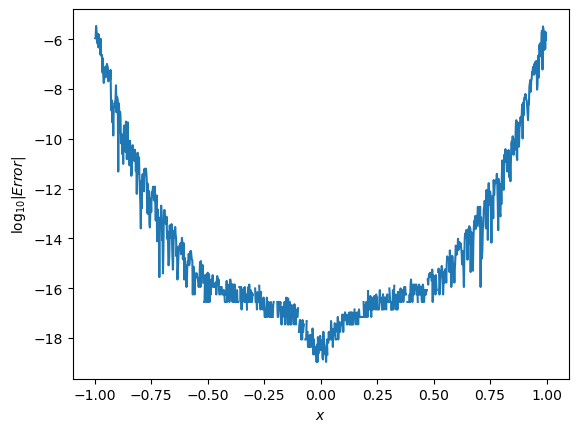

51
2


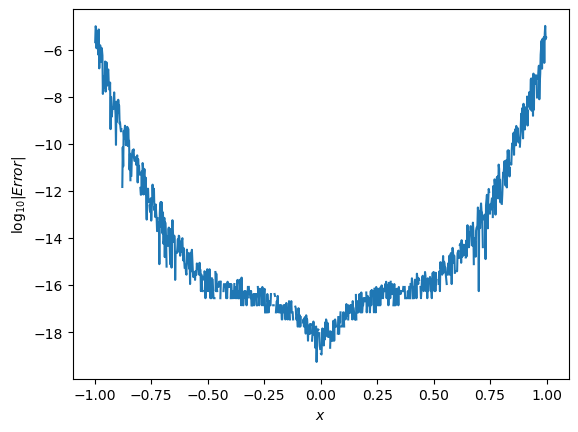

52
3


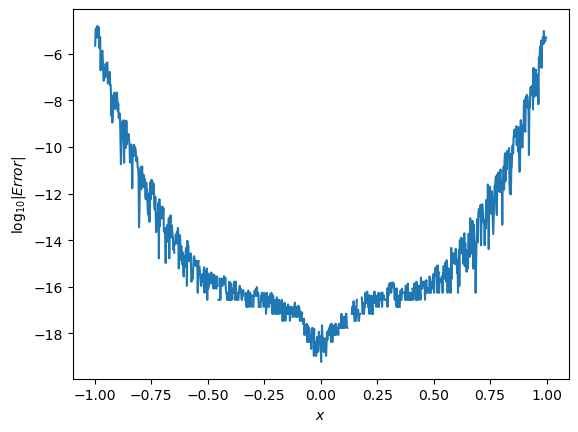

53
4


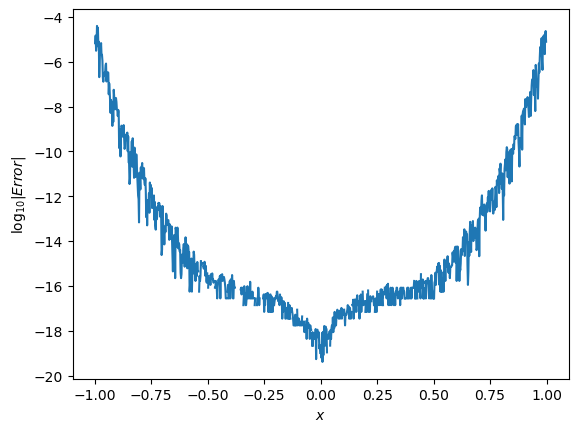

54
5


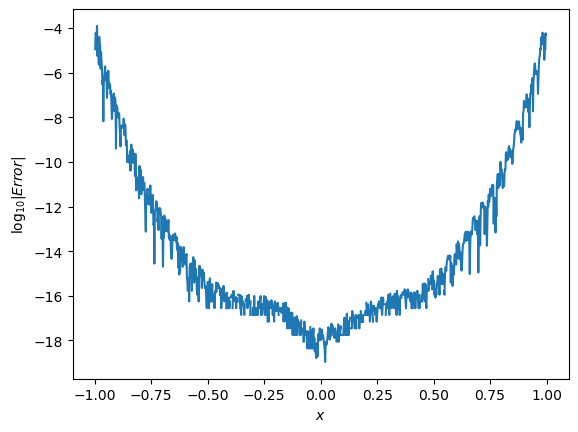

55
6


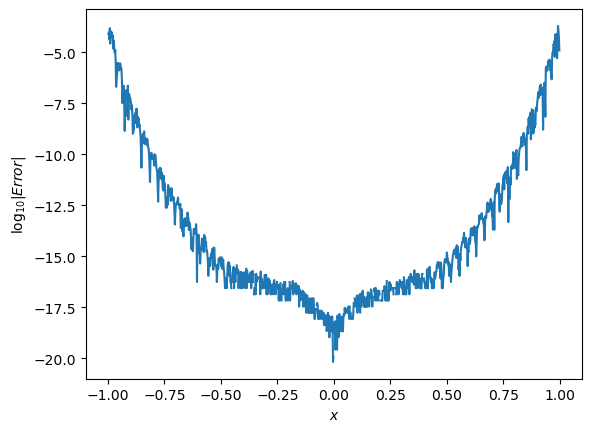

56
7


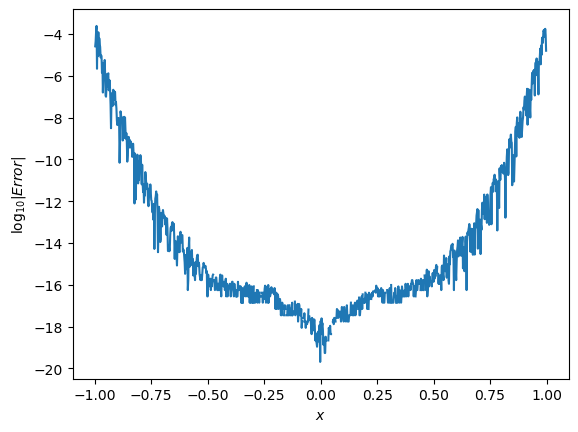

57
8


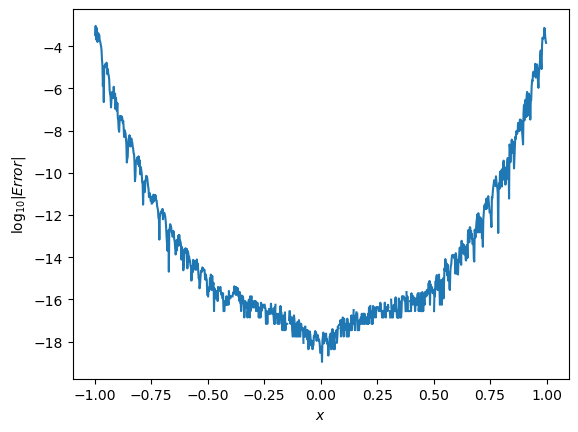

58
9


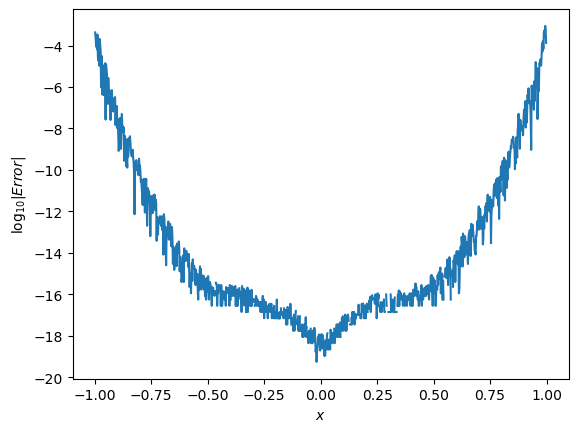

In [6]:
for i in range(0, 10):
    xnodes = np.linspace(-1, 1, 49+i)
    fnodes = f1(xnodes)
    print(xnodes.size)
    print(i)
    interp_plotter(xnodes, fnodes, xquery, ftrue)
    

    


# Chevysehv

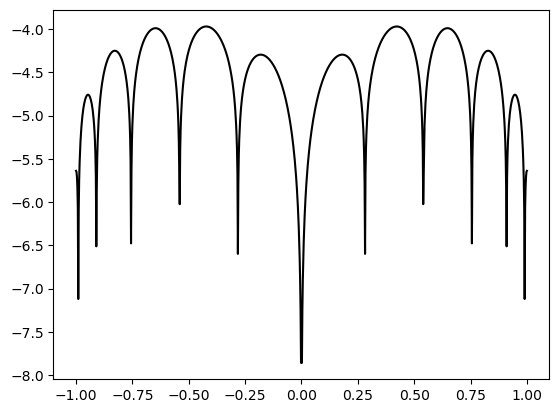

In [7]:
ncheb = 10
xinterp = xquery
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = f1(xcheb)
finterp = lagran_interp(xcheb, fcheb, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
plt.show()

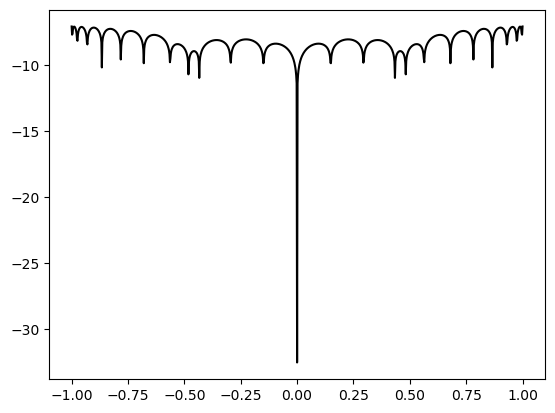

In [8]:
ncheb = 20
xinterp = xquery
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = f1(xcheb)
finterp = lagran_interp(xcheb, fcheb, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
plt.show()

11


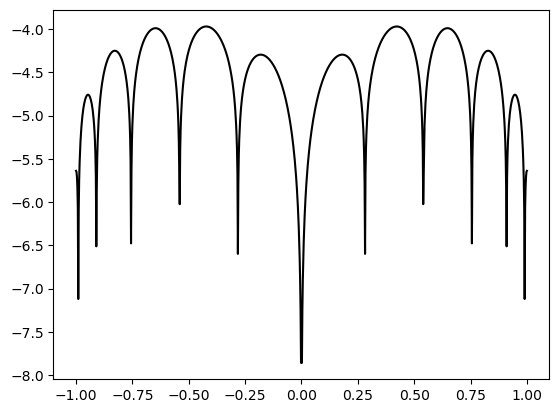

21


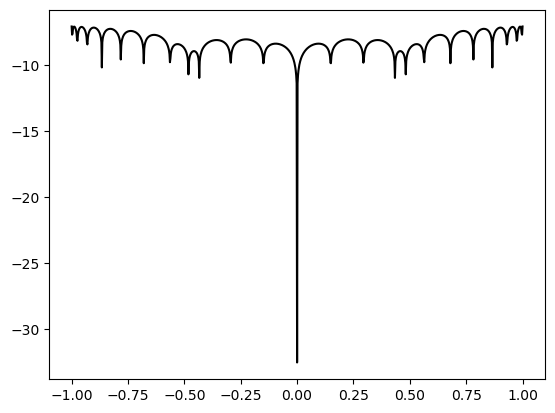

31


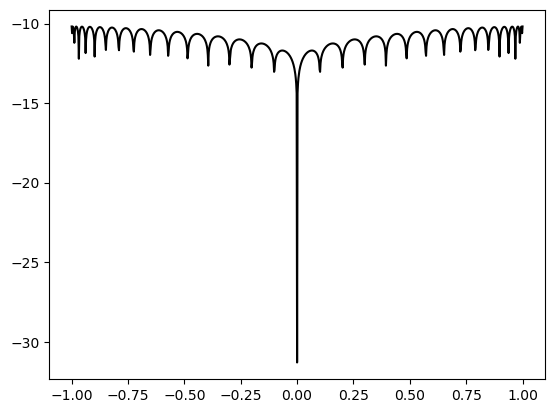

41


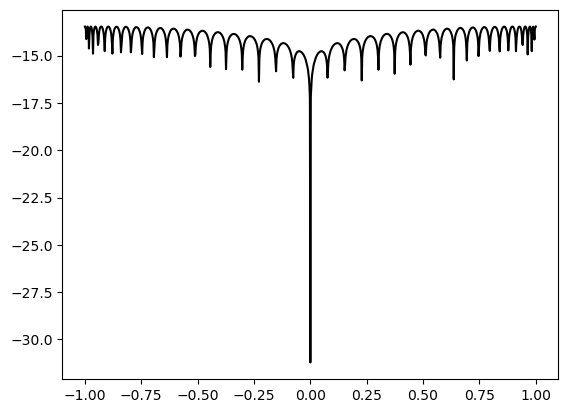

51


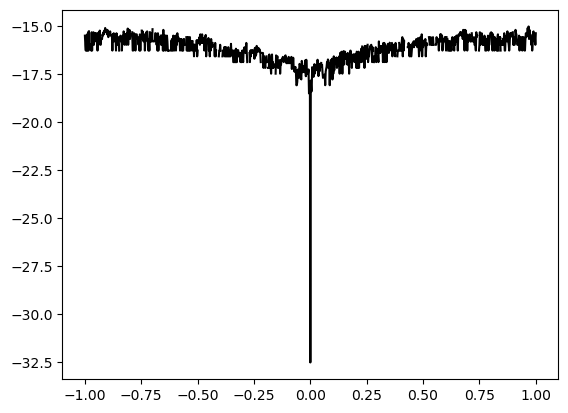

61


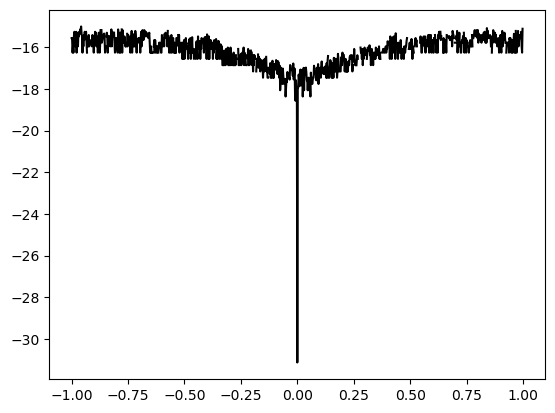

71


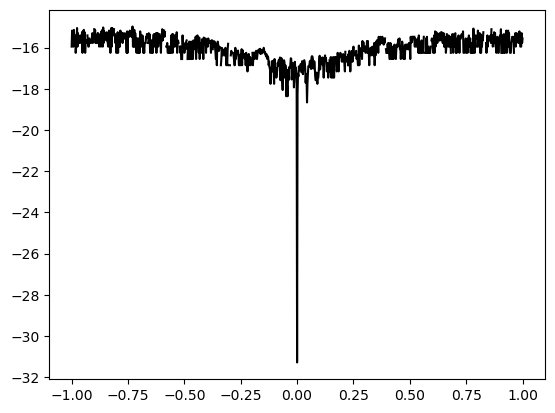

81


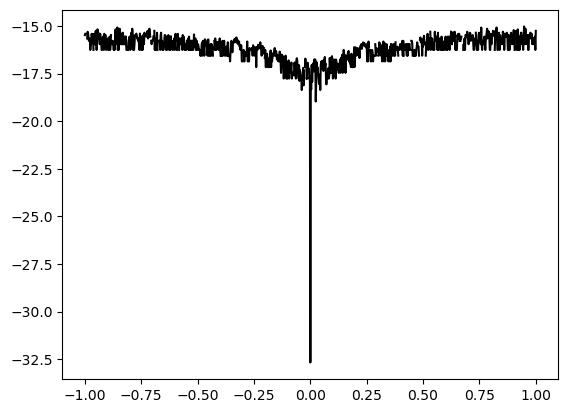

91


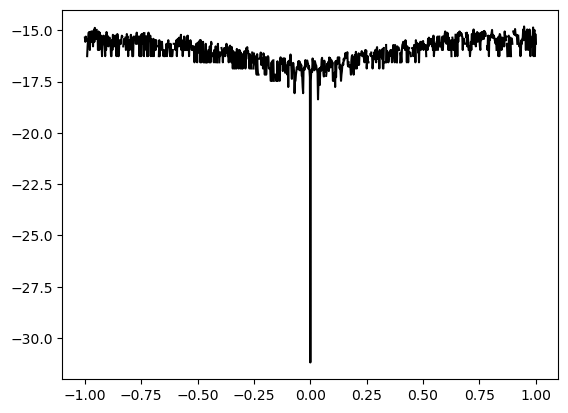

101


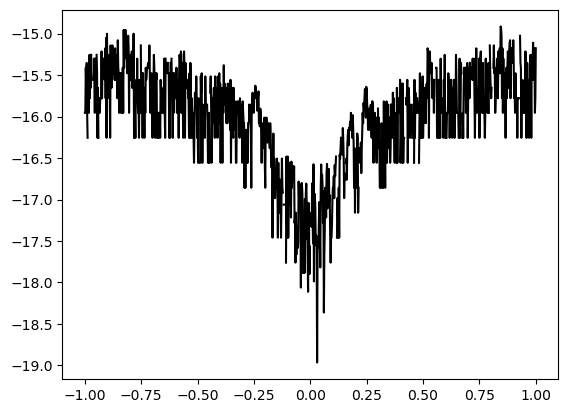

In [9]:
for i in range(10, 101, 10):
    ncheb = i
    xinterp = xquery
    xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
    fcheb = f1(xcheb)
    finterp = lagran_interp(xcheb, fcheb, xinterp)
    print(xcheb.size)
    plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
    plt.show()